In [1]:
from utils import *
from objects import *
from sweeper_helperfunctions import *

In [2]:
design = metal.designs.design_planar.DesignPlanar()
gui = metal.MetalGUI(design)
design.overwrite_enabled = True

In [3]:
cpw_sweep_opts = Dict(
                fillet = '49.9um',
                total_length = [f"{i * 500 + 1700}um" for i in range(15)][4:],
                trace_width = "11.7um",
                trace_gap = '5.1um')

In [4]:
claw_sweep_opts = dict(
    connection_pads=dict(
        readout = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '215um',
                 ground_spacing = '10um', 
                 claw_gap = '5.1um', 
                 claw_width = '15um',#[f"{i * 2 + 7}um" for i in range(12)][4:],
                 claw_cpw_width = "11.7um",
                 claw_cpw_length = '0um'
                 ),
    ),
    cross_width = '30um',
    cross_length = '240um',
    cross_gap = '30um',
)

In [5]:
cplr_sweep_opts = Dict(prime_width = "11.7um",
            prime_gap = '5.1um',
            second_width = "11.7um",
            second_gap = '5.1um',
            coupling_space = '7.9um',
            coupling_length = '225um',
            open_termination = False,
            down_length = '50um')

In [6]:
sweep_opts = Dict(claw_opts = claw_sweep_opts, cpw_opts = cpw_sweep_opts, cplr_opts = cplr_sweep_opts)

Starting the Simulation


INFO 06:08PM [connect_project]: Connecting to Ansys Desktop API...
INFO 06:08PM [load_ansys_project]: 	Opened Ansys App
INFO 06:08PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 06:08PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/lfl/Documents/Ansoft/
	Project:   Project34
INFO 06:08PM [connect_design]: No active design found (or error getting active design).
INFO 06:08PM [connect]: 	 Connected to project "Project34". No design detected
INFO 06:08PM [connect_design]: 	Opened active design
	Design:    CavitySweep [Solution type: Eigenmode]
WARNING 06:08PM [connect_setup]: 	No design setup detected.
WARNING 06:08PM [connect_setup]: 	Creating eigenmode default setup.
INFO 06:08PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 06:08PM [connect_design]: 	Opened active design
	Design:    CavitySweep_hfss [Solution type: Eigenmode]
WARNING 06:08PM [connect_setup]: 	No design setup detected.
WARNING 06:08PM [connect_setup]: 	Creating e

creaing porst
Sim rendered into HFSS!
pyaedt INFO: using existing logger.


INFO:Global:using existing logger.


pyaedt INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.


INFO:Global:Launching PyAEDT outside AEDT with CPython and PythonNET.


pyaedt INFO: AEDT installation Path D:\Program Files\AnsysEM\AnsysEM21.1\Win64.


INFO:Global:AEDT installation Path D:\Program Files\AnsysEM\AnsysEM21.1\Win64.


pyaedt INFO: Launching AEDT with module PythonNET.


INFO:Global:Launching AEDT with module PythonNET.


pyaedt WARNING: PyAEDT is not supported in AEDT versions earlier than 2021 R2. Trying to launch PyAEDT with PyWin32.


pyaedt INFO: pyaedt v0.6.46


INFO:Global:pyaedt v0.6.46


pyaedt INFO: Python version 3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 17:59:51) [MSC v.1935 64 bit (AMD64)]


INFO:Global:Python version 3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 17:59:51) [MSC v.1935 64 bit (AMD64)]


pyaedt INFO: Project Project34 set to active.


INFO:Global:Project Project34 set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt INFO: Project files removed from handlers.


INFO:Global:Project files removed from handlers.
INFO 06:08PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 06:08PM [analyze]: Analyzing setup Setup
08:58PM 16s INFO [get_f_convergence]: Saved convergences to d:\andre\cavity_sweeps\hfss_eig_f_convergence.csv


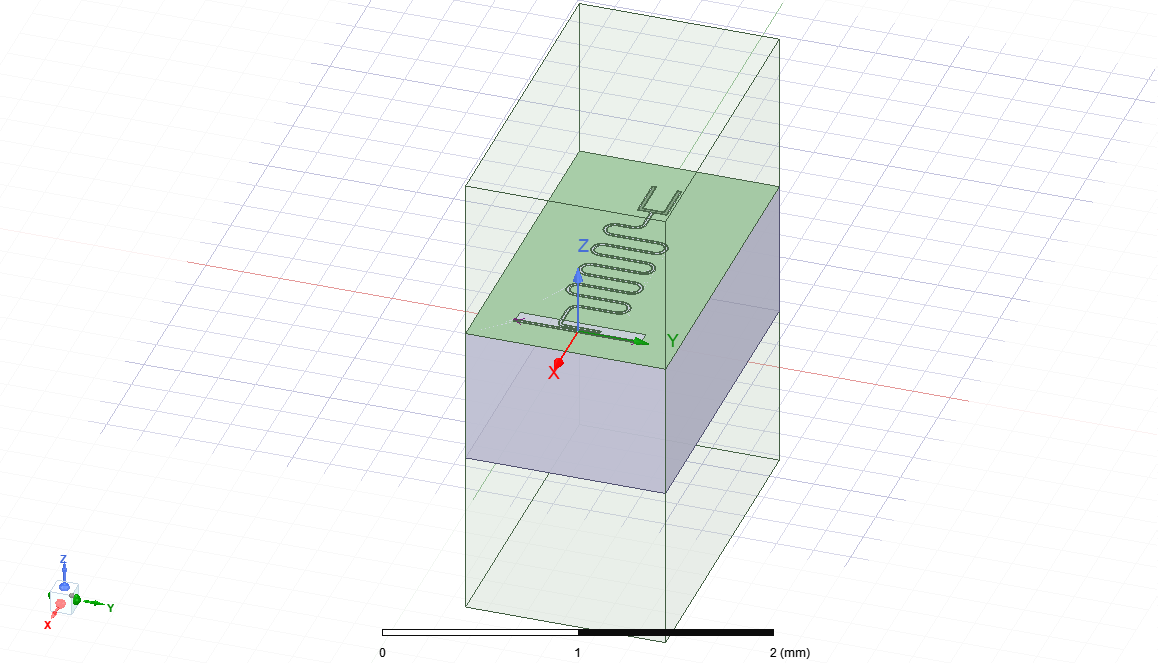

INFO 08:58PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


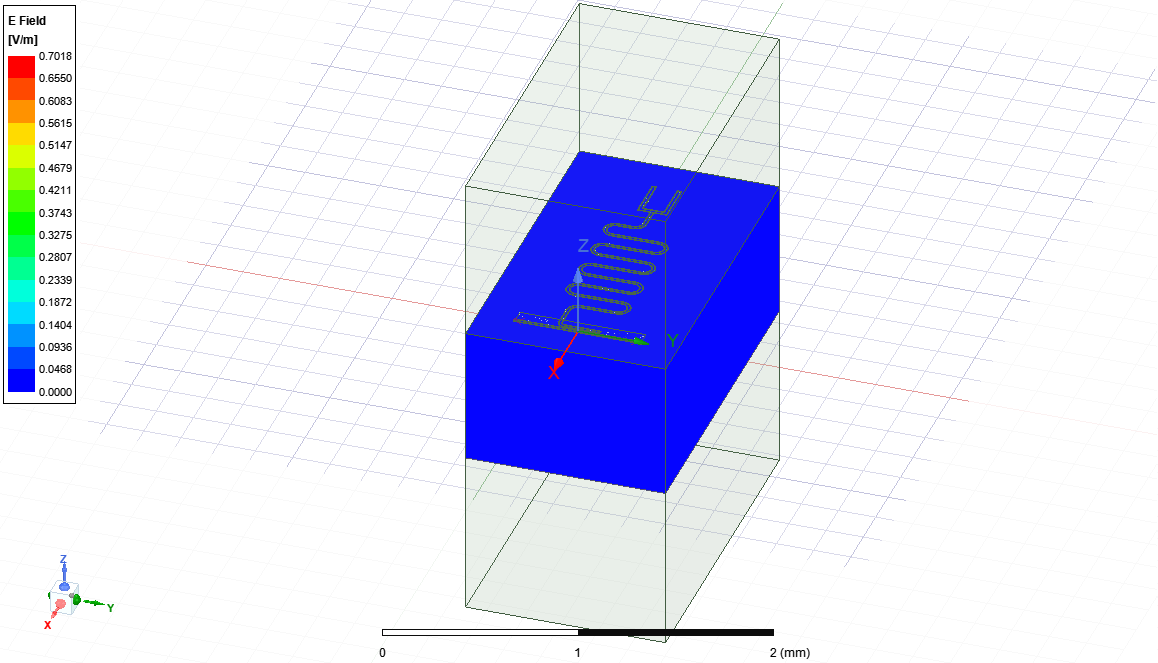

Design "CavitySweep_hfss" info:
	# eigenmodes    1
	# variations    1
Design "CavitySweep_hfss" info:
	# eigenmodes    1
	# variations    1
freq = 6.63 GHz
Q = 44065.8
kappa = 0.15 MHz
Starting the Simulation


INFO 08:58PM [connect_project]: Connecting to Ansys Desktop API...
INFO 08:58PM [load_ansys_project]: 	Opened Ansys App
INFO 08:58PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 08:58PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/lfl/Documents/Ansoft/
	Project:   Project34
INFO 08:58PM [connect_design]: 	Opened active design
	Design:    CavitySweep_hfss [Solution type: Eigenmode]
INFO 08:58PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 08:58PM [connect]: 	Connected to project "Project34" and design "CavitySweep_hfss" 😀 

INFO 08:58PM [connect_design]: 	Opened active design
	Design:    CavitySweep1 [Solution type: Eigenmode]
WARNING 08:58PM [connect_setup]: 	No design setup detected.
WARNING 08:58PM [connect_setup]: 	Creating eigenmode default setup.
INFO 08:58PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 08:58PM [connect_design]: 	Opened active design
	Design:    CavitySweep_hfss [Solution t

creaing porst
Sim rendered into HFSS!
pyaedt INFO: using existing logger.


INFO:Global:using existing logger.


pyaedt INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.


INFO:Global:Launching PyAEDT outside AEDT with CPython and PythonNET.


pyaedt INFO: AEDT installation Path D:\Program Files\AnsysEM\AnsysEM21.1\Win64.


INFO:Global:AEDT installation Path D:\Program Files\AnsysEM\AnsysEM21.1\Win64.


pyaedt INFO: Launching AEDT with module PythonNET.


INFO:Global:Launching AEDT with module PythonNET.


pyaedt WARNING: PyAEDT is not supported in AEDT versions earlier than 2021 R2. Trying to launch PyAEDT with PyWin32.


pyaedt INFO: pyaedt v0.6.46


INFO:Global:pyaedt v0.6.46


pyaedt INFO: Python version 3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 17:59:51) [MSC v.1935 64 bit (AMD64)]


INFO:Global:Python version 3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 17:59:51) [MSC v.1935 64 bit (AMD64)]


pyaedt INFO: Project Project34 set to active.


INFO:Global:Project Project34 set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt INFO: Project files removed from handlers.


INFO:Global:Project files removed from handlers.
INFO 08:59PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 08:59PM [analyze]: Analyzing setup Setup


In [7]:
CLT_epr_sweep(design, sweep_opts = sweep_opts)